<a href="https://colab.research.google.com/github/raulbenitez/ZUMAIN_course/blob/main/analisis_datos_multivariados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de datos multivariados

1. Lectura de datos con python
2. Descripcion univariado de la respuesta y de las variables de entrada
3. Descripcion variables de entrada vs resposta
4. Feature selection (mutual information, test estadísticos, correlación, ANOVA, chi cuadrado y RFE- recursive feature elimination) 
5. Modelo de regresión múltiple - si la varible respuesta se cualitativa haces un logístico y sino una regresión múltiple) 
6. Training del algoritmo tanto de clasificación como de regresión

## 1. Lectura de datos con Python

Los datos deben ser subidos a la sessión de google colab o accesibles en una carpeta de Google Drive. 

Para subir un fichero de datos a Google Colab havemos lo siguiente:

In [1]:
from google.colab import files 
import io
uploaded = files.upload()

Saving ESTADISTICOS.xlsx to ESTADISTICOS.xlsx


En caso de tener el fichero en una carpeta de nuestro Google Drive, hay que montar la unidad en la sesión de Google Colab ejecutando la siguiente instrucción

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Leemos los datos y los cargamos en una variable del tipo dataframe de la librería Pandas

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('ESTADISTICOS.xlsx',header=0)
df.head()

,Projecto,Vuelo,Parcela,Numero_pie,Zona,IMAGEN,Afeccion,ID_Unico,RWC,SLA,RNV,PHE,TAN,CLOa,CLOb,CARO,N,C,P,K,Ca,Mg,S,Cl,Si,Î´ 15NAI,Î´ 13CVP,RW2018,RW2017,RW2016,RW2015,RW2014,RW2013,RW2012,RW2011,RW2010,Ergoster,Perfil,N_1,DT01,...,md_Banda_236,sd_Banda_236,md_Banda_237,sd_Banda_237,md_Banda_238,sd_Banda_238,md_Banda_239,sd_Banda_239,md_Banda_240,sd_Banda_240,md_Banda_241,sd_Banda_241,md_Banda_242,sd_Banda_242,md_Banda_243,sd_Banda_243,md_Banda_244,sd_Banda_244,md_Banda_245,sd_Banda_245,md_Banda_246,sd_Banda_246,md_Banda_247,sd_Banda_247,md_Banda_248,sd_Banda_248,md_Banda_249,sd_Banda_249,md_Banda_250,sd_Banda_250,md_Banda_251,sd_Banda_251,md_PC1,sd_PC1,md_PC2,sd_PC2,md_PC3,sd_PC3,md_PC4,sd_PC4
0,Kaudal I,1,PA1,20,Palencia 1,raw_13408,1,1PA120,46.07,88.88,NaN,NaN,NaN,NaN,NaN,NaN,2.226,NaN,1765.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.370371,0.239609,0.624316,0.554729,0.552716,0.635217,0.518936,0.659762,0.383532,NaN,NaN,NaN,NaN,...,0.433732,0.031652,0.434195,0.029501,0.433622,0.029035,0.433361,0.024241,0.431977,0.022191,0.429215,0.017940,0.428826,0.019257,0.432067,0.017315,0.435539,0.019088,0.432166,0.018010,0.433252,0.018976,0.432435,0.017127,0.430390,0.018196,0.432441,0.016994,0.430791,0.018077,0.429400,0.017271,20.386370,2.241950,NaN,NaN,NaN,NaN,NaN,NaN
1,Kaudal I,1,PA1,1,Palencia 1,raw_13408,1,1PA11,48.96,101.08,NaN,NaN,NaN,NaN,NaN,NaN,1.763,NaN,2051.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.877088,0.526232,0.761613,0.873261,0.552874,0.773410,0.753700,0.697968,0.788073,NaN,NaN,NaN,NaN,...,0.425856,0.020303,0.427453,0.020234,0.425998,0.019020,0.429250,0.015973,0.433349,0.014969,0.435198,0.012955,0.431695,0.013020,0.434648,0.012512,0.433423,0.012753,0.430950,0.012460,0.431788,0.012787,0.435219,0.011817,0.428699,0.012076,0.433668,0.012379,0.430397,0.012407,0.429887,0.013447,19.571127,1.747279,NaN,NaN,NaN,NaN,NaN,NaN
2,Kaudal I,1,PA1,4,Palencia 1,raw_13408,1,1PA14,51.33,140.31,NaN,NaN,NaN,NaN,NaN,NaN,2.624,NaN,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.273419,1.813924,1.487726,0.890698,1.301215,1.458398,1.008350,0.903829,1.199661,NaN,NaN,NaN,NaN,...,0.446528,0.026131,0.444909,0.024699,0.442931,0.023187,0.440854,0.019926,0.443019,0.018066,0.438906,0.015009,0.441692,0.015039,0.441390,0.015125,0.446002,0.015843,0.441799,0.015644,0.442963,0.014828,0.443226,0.013914,0.440594,0.014318,0.443856,0.014632,0.442598,0.014629,0.438628,0.015165,22.576169,2.835996,NaN,NaN,NaN,NaN,NaN,NaN
3,Kaudal I,1,PA1,6,Palencia 1,raw_13408,1,1PA16,47.23,101.27,NaN,NaN,NaN,NaN,NaN,NaN,1.732,NaN,1785.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.347636,0.291534,0.276043,0.358380,0.239601,0.420981,0.512240,0.420161,0.329300,NaN,NaN,NaN,NaN,...,0.445586,0.025739,0.442597,0.023991,0.441856,0.022715,0.437602,0.019766,0.439494,0.017640,0.435101,0.014769,0.439206,0.013599,0.440598,0.013506,0.443893,0.015111,0.439104,0.014138,0.441078,0.014770,0.439510,0.014086,0.440116,0.013870,0.440462,0.013424,0.439987,0.014178,0.436359,0.014038,22.141045,2.229509,NaN,NaN,NaN,NaN,NaN,NaN
4,Kaudal I,1,PA1,9,Palencia 1,raw_13408,1,1PA19,56.23,91.70,NaN,NaN,NaN,NaN,NaN,NaN,2.015,NaN,1876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266104,0.227464,0.624793,0.225906,0.385369,0.349394,0.320325,0.249957,0.231170,NaN,NaN,NaN,NaN,...,0.389827,0.010884,0.393880,0.013856,0.392737,0.012206,0.402364,0.011447,0.407680,0.009977,0.412839,0.010102,0.411619,0.010234,0.414561,0.009179,0.411464,0.009520,0.413211,0.009371,0.409894,0.010178,0.416278,0.010410,0.411576,0.009810,0.417156,0.009113,0.411803,0.010920,0.411202,0.012521,18.146144,1.087736,NaN,NaN,NaN,NaN,NaN,NaN


Consultamos las columnas del dataframe

In [3]:
df.columns

Index(['Projecto', 'Vuelo', 'Parcela', 'Numero_pie', 'Zona', 'IMAGEN',
       'Afeccion', 'ID_Unico', 'RWC', 'SLA',
       ...
       'md_Banda_251', 'sd_Banda_251', 'md_PC1', 'sd_PC1', 'md_PC2', 'sd_PC2',
       'md_PC3', 'sd_PC3', 'md_PC4', 'sd_PC4'],
      dtype='object', length=588)

In [4]:
df.describe()

,Vuelo,Numero_pie,Afeccion,RWC,SLA,RNV,PHE,TAN,CLOa,CLOb,CARO,N,C,P,K,Ca,Mg,S,Cl,Si,Î´ 15NAI,Î´ 13CVP,RW2018,RW2017,RW2016,RW2015,RW2014,RW2013,RW2012,RW2011,RW2010,Ergoster,N_1,DT01,DT02,DT03,DT04,DT05,DT06,DT07,...,md_Banda_236,sd_Banda_236,md_Banda_237,sd_Banda_237,md_Banda_238,sd_Banda_238,md_Banda_239,sd_Banda_239,md_Banda_240,sd_Banda_240,md_Banda_241,sd_Banda_241,md_Banda_242,sd_Banda_242,md_Banda_243,sd_Banda_243,md_Banda_244,sd_Banda_244,md_Banda_245,sd_Banda_245,md_Banda_246,sd_Banda_246,md_Banda_247,sd_Banda_247,md_Banda_248,sd_Banda_248,md_Banda_249,sd_Banda_249,md_Banda_250,sd_Banda_250,md_Banda_251,sd_Banda_251,md_PC1,sd_PC1,md_PC2,sd_PC2,md_PC3,sd_PC3,md_PC4,sd_PC4
count,673.000000,673.000000,673.000000,673.000000,673.000000,421.000000,421.000000,421.000000,169.000000,169.000000,169.000000,673.000000,448.000000,673.000000,448.000000,448.000000,448.000000,98.000000,98.000000,98.000000,336.000000,336.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,111.000000,169.000000,148.000000,113.000000,150.000000,169.000000,169.000000,113.000000,169.000000,...,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,61.000000,61.000000,0.0,0.0,0.0,0.0
mean,3.496285,9.463596,0.625557,69.027137,62.239431,32.009827,12.939915,24.129033,0.595427,0.378813,0.123124,1.275274,50.284797,1165.261540,3110.359217,2161.643651,2231.497237,807.378469,213.570510,776.534796,-0.987313,-26.945664,1.246075,0.818132,1.309370,1.135253,1.280116,1.320659,1.116734,1.410615,1.424896,2.516198,4046.473373,1.130052,0.763002,0.603611,0.413225,0.599869,0.999716,7.832811,...,0.416796,0.029488,0.418227,0.027308,0.418780,0.026473,0.421681,0.022301,0.421631,0.020763,0.423366,0.017305,0.423946,0.017832,0.423858,0.016986,0.423630,0.018286,0.424644,0.017124,0.423579,0.017657,0.423458,0.016112,0.423252,0.017231,0.423043,0.016190,0.422361,0.016981,0.422253,0.015956,31.749412,3.659628,0.065391,1.813777,NaN,NaN,NaN,NaN
std,1.710542,6.985887,0.484339,20.836841,29.461688,12.248021,4.626881,13.969674,0.503187,0.240404,0.103357,0.686945,5.190092,510.865839,2654.426949,1818.297013,2610.087617,188.533597,84.832722,1298.677877,1.181215,2.206004,0.735331,0.582920,0.702462,0.685898,0.834298,0.872228,0.761589,0.953076,1.005595,5.419994,1722.371790,1.768041,1.361816,0.964193,0.506314,0.653814,1.767392,17.796285,...,0.048181,0.011038,0.046446,0.010325,0.044840,0.009551,0.041530,0.008023,0.040179,0.006743,0.038538,0.005709,0.038643,0.005792,0.037869,0.005922,0.038763,0.006099,0.038527,0.005785,0.038457,0.005671,0.037714,0.005382,0.038307,0.005467,0.037568,0.005260,0.038185,0.005227,0.037905,0.005079,9.493912,1.257512,1.923001,0.547928,NaN,NaN,NaN,NaN
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102900,0.084700,0.018700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,562.600000,61.800000,105.800000,-3.834000,-29.351000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.671316,0.346016,NaN,NaN,NaN,NaN
25%,2.000000,4.000000,0.000000,46.480000,38.840000,22.774189,9.548804,15.088835,0.237200,0.182000,0.049700,0.677000,48.793215,738.000000,1242.389250,1126.000000,975.675000,656.450000,142.975000,155.375000,-1.672000,-27.542000,0.707174,0.367307,0.760189,0.623042,0.

### Filtrado de datos

Generar un nuevo dataframe con las observaciones que presentan un valor de la columna RWC superior a la media de esa variable:

In [6]:
df1 = df.loc[df['RWC']>df['RWC'].mean()]
df1.head()

,Projecto,Vuelo,Parcela,Numero_pie,Zona,IMAGEN,Afeccion,ID_Unico,RWC,SLA,RNV,PHE,TAN,CLOa,CLOb,CARO,N,C,P,K,Ca,Mg,S,Cl,Si,Î´ 15NAI,Î´ 13CVP,RW2018,RW2017,RW2016,RW2015,RW2014,RW2013,RW2012,RW2011,RW2010,Ergoster,Perfil,N_1,DT01,...,md_Banda_236,sd_Banda_236,md_Banda_237,sd_Banda_237,md_Banda_238,sd_Banda_238,md_Banda_239,sd_Banda_239,md_Banda_240,sd_Banda_240,md_Banda_241,sd_Banda_241,md_Banda_242,sd_Banda_242,md_Banda_243,sd_Banda_243,md_Banda_244,sd_Banda_244,md_Banda_245,sd_Banda_245,md_Banda_246,sd_Banda_246,md_Banda_247,sd_Banda_247,md_Banda_248,sd_Banda_248,md_Banda_249,sd_Banda_249,md_Banda_250,sd_Banda_250,md_Banda_251,sd_Banda_251,md_PC1,sd_PC1,md_PC2,sd_PC2,md_PC3,sd_PC3,md_PC4,sd_PC4
28,Kaudal I,1,S1,1,Segovia,raw_1184,1,1S11,84.62,45.97,9.107,16.216,24.706,1.2647,0.6555,0.2640,1.358,NaN,1734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.113143,2.425153,2.830946,2.954064,2.787862,2.879144,2.683061,2.705759,2.427779,NaN,D,3121.0,0.0,...,0.386793,0.021089,0.387702,0.019341,0.388424,0.019575,0.397568,0.016806,0.397362,0.016587,0.408188,0.014378,0.404998,0.014818,0.408904,0.013816,0.402083,0.014833,0.410036,0.014092,0.404103,0.014890,0.409232,0.013613,0.401958,0.014138,0.409440,0.013867,0.405946,0.014377,0.409227,0.012997,30.815768,3.000246,NaN,NaN,NaN,NaN,NaN,NaN
29,Kaudal I,1,S1,9,Segovia,raw_1184,1,1S19,100.00,63.69,9.226,18.225,23.487,1.7786,0.9016,0.3694,1.236,NaN,1581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.607970,0.219207,1.614052,1.323967,1.270962,1.138470,1.044699,2.232966,2.430802,NaN,D,3123.0,0.0,...,0.385500,0.020808,0.388053,0.019460,0.387560,0.019733,0.398830,0.017467,0.398427,0.016499,0.410263,0.014615,0.405321,0.015187,0.409380,0.014196,0.401800,0.014226,0.410575,0.014396,0.404621,0.014325,0.409539,0.013257,0.404436,0.014102,0.409177,0.013478,0.404702,0.013753,0.410662,0.012904,30.628319,3.216425,NaN,NaN,NaN,NaN,NaN,NaN
30,Kaudal I,1,S1,18,Segovia,raw_1184,1,1S118,82.50,65.25,14.016,21.344,37.547,1.6854,0.8202,0.3785,1.484,NaN,1248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.557323,0.077496,0.864360,0.599306,0.693252,0.727482,0.446332,0.984321,1.182122,NaN,D,2051.0,0.0,...,0.385128,0.022792,0.385297,0.019851,0.386417,0.020485,0.393962,0.017335,0.396620,0.017141,0.406863,0.014067,0.404227,0.015435,0.406896,0.014084,0.402839,0.015226,0.408252,0.013306,0.404350,0.014602,0.407752,0.012881,0.404190,0.014133,0.406715,0.012586,0.406328,0.013966,0.407825,0.012240,30.180505,3.423233,NaN,NaN,NaN,NaN,NaN,NaN
31,Kaudal I,1,S1,20,Segovia,raw_1184,1,1S120,85.26,54.46,13.473,24.071,47.670,1.7043,0.8523,0.3885,1.630,NaN,1651.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079707,0.927432,1.027177,0.895636,0.489290,0.843103,1.688312,1.922349,1.340772,NaN,D,1016.0,0.0,...,0.382817,0.022240,0.383066,0.020059,0.385613,0.020240,0.392110,0.017115,0.395686,0.017018,0.405418,0.014494,0.403516,0.015181,0.405070,0.013922,0.401379,0.014484,0.406944,0.013619,0.403007,0.014530,0.405864,0.013424,0.402591,0.014354,0.406221,0.012644,0.405455,0.013425,0.407534,0.012558,29.223937,2.957811,NaN,NaN,NaN,NaN,NaN,NaN
32,Kaudal I,1,S1,16,Segovia,raw_1184,1,1S116,87.00,84.98,12.524,15.235,22.750,1.3403,0.8482,0.2797,1.706,NaN,1617.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.494764,0.706836,0.707174,0.252716,0.214912,0.328364,0.862278,0.740377,0.641406,NaN,D,1020.0,0.0,...,0.390605,0.021022,0.390605,0.020085,0.392048,0.018915,0.400538,0.016478,0.402743,0.016513,0.411257,0.014061,0.409130,0.014470,0.410633,0.013034,0.405247,0.014392,0.411611,0.013383,0.408266,0.014815,0.411626,0.012891,0.407239,0.013739,0.411496,0.012484,0.410155,0.013513,0.411582,0.013168,30.581841,2.943718,NaN,NaN,NaN,NaN,NaN,NaN


### Visualización de datos

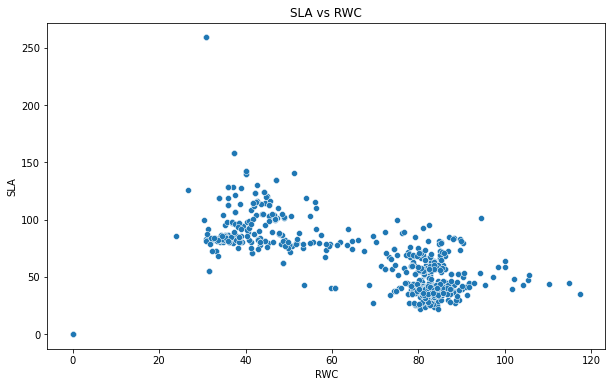

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="RWC", y="SLA", data=df)
ax.set_title('SLA vs RWC')
plt.show()


Las librerías plotly permiten generar gráficos interactivos (y luego se pueden utilizar para generar interfaces de usuario en la plataforma DASH):

In [8]:
import pandas as pd
import plotly.express as px
fig = px.scatter(df,x="RWC", y="SLA")
fig.show()

Heatmap de la correlación entre variables

In [22]:
df3 = df.iloc[:, [8,9,16,18]] # seleccionar variables de interés
df3.head()

,RWC,SLA,N,P
0,46.07,88.88,2.226,1765.0
1,48.96,101.08,1.763,2051.0
2,51.33,140.31,2.624,1986.0
3,47.23,101.27,1.732,1785.0
4,56.23,91.70,2.015,1876.0


In [23]:
df3.describe()

,RWC,SLA,N,P
count,673.000000,673.000000,673.000000,673.000000
mean,69.027137,62.239431,1.275274,1165.261540
std,20.836841,29.461688,0.686945,510.865839
min,0.000000,0.000000,0.000000,0.000000
25%,46.480000,38.840000,0.677000,738.000000
50%,80.570000,55.653351,1.153000,987.700000
75%,83.815000,82.074752,1.756869,1515.800000
max,117.328230,259.060000,3.721000,2970.000000


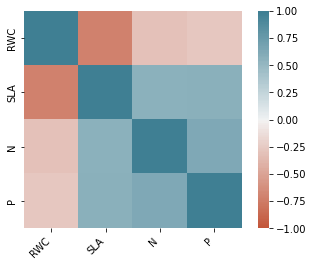

In [24]:
corr = df3.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Scatterplot matrix

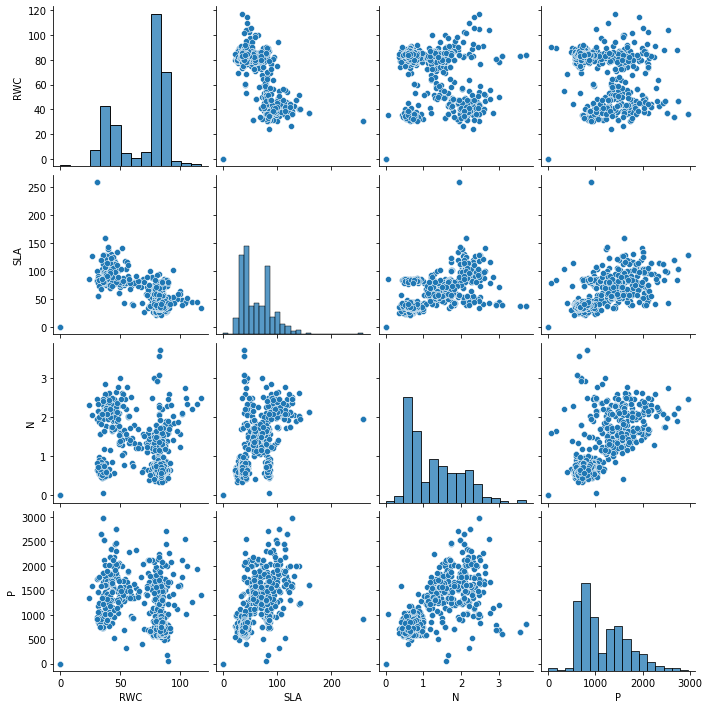

In [27]:
sns.pairplot(df3)
plt.show()

### Clustering algorithms

Creamos un nuevo dataframe con las dos variables que nos interesan

In [21]:
from sklearn.cluster import KMeans

df2 = df[['SLA','RWC']]
df2.head()

,SLA,RWC
0,88.88,46.07
1,101.08,48.96
2,140.31,51.33
3,101.27,47.23
4,91.70,56.23


Aplicamos el algoritmo de agrupemiento k-means para buscar dos grupos y representamos el resultado

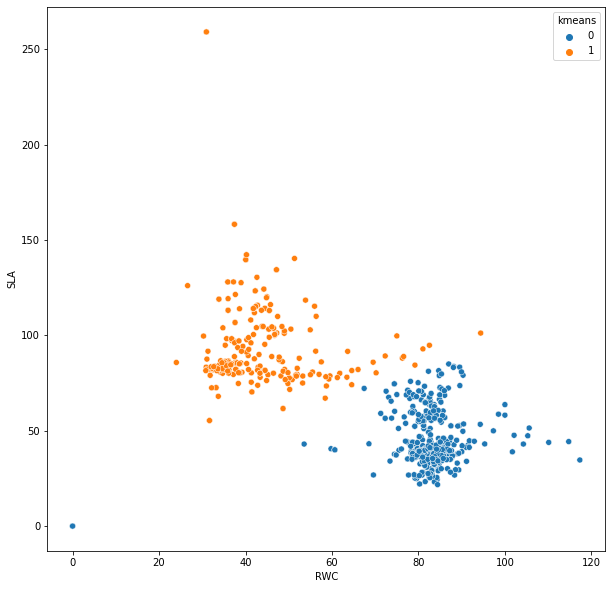

In [23]:
group = KMeans(n_clusters=2).fit_predict(df2)
df['kmeans'] = group 
fig = plt.figure(figsize=(10,10)) 
sns.scatterplot(x="RWC", y="SLA",hue='kmeans',data=df)
plt.show()

## Multivariate regression methods

### Standard multivariate linear regression

In [28]:
df3.columns

Index(['RWC', 'SLA', 'N', 'P'], dtype='object')

In [31]:
import statsmodels.api as sm # import statsmodels 

X = df3[['N','P','SLA']] ## X are the input variables (or independent variables)
y = df3["RWC"] ## Y is the output/dependent variable
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit() 
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RWC   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     267.6
Date:                Sat, 16 Oct 2021   Prob (F-statistic):          4.43e-114
Time:                        08:58:30   Log-Likelihood:                -2732.9
No. Observations:                 673   AIC:                             5474.
Df Residuals:                     669   BIC:                             5492.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.3903      1.459     65.395      0.000      92.526      98.254
N              1.4374      1.071      1.343      0.180      -0.665       3.540
P              0.0082      0.001      5.576      0.000       0.005       0.011
SLA           -0.6062      0.024    -25.608      0.000      -0.653      -0.560
==============================================================================
Omnibus:                      145.967   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2274.740
Skew:                          -0.486   Prob(JB):                         0.00
Kurtosis:                      11.954   Cond. No.                     3.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
model.params

const    95.390300
N         1.437448
P         0.008184
SLA      -0.606243
dtype: float64

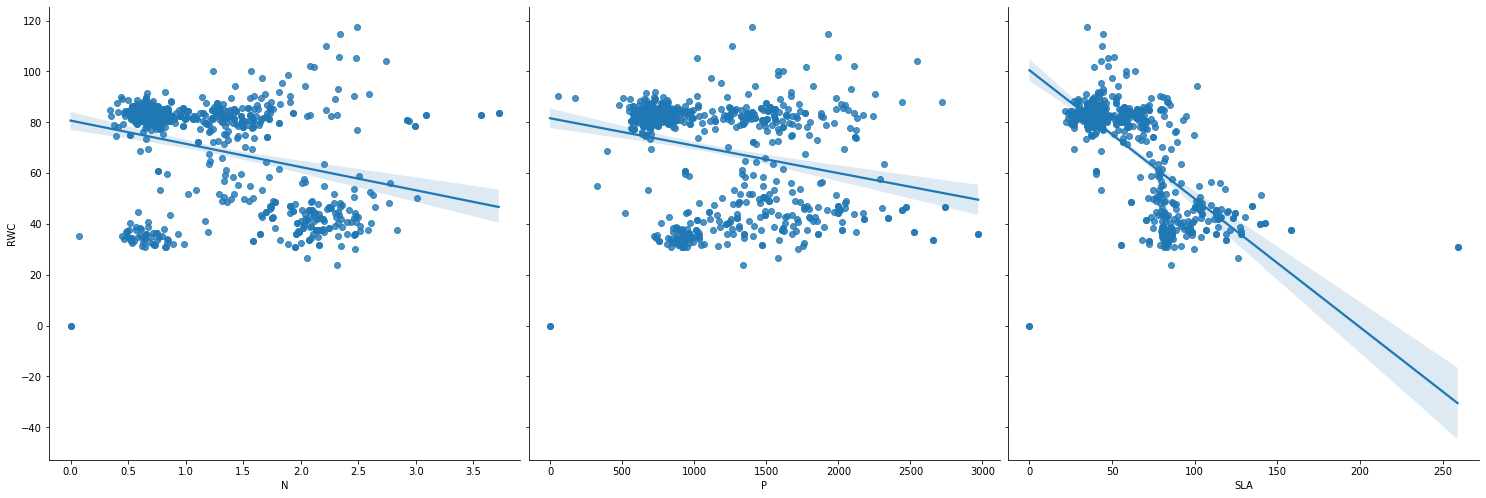

In [33]:
import matplotlib.pyplot as plt
sns.pairplot(df3, kind="reg",x_vars=['N','P','SLA'],y_vars=["RWC"],height=7)
plt.show()

### Decision tree regression (univariate)

In [36]:
y.shape

(673,)

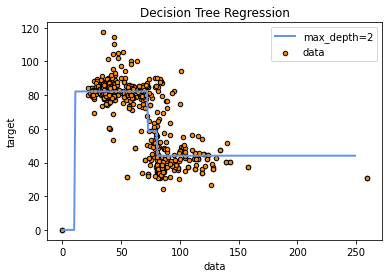

In [38]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Fit regression model
X = df3[['SLA']] ## X are the input variables (or independent variables)
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)

# Predict:
X_test = np.arange(0.0, 250, 1)[:, np.newaxis]
y_1 = regr_1.predict(X_test)


# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


Logistic Regression (categorical variables output)

In [45]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X = df3[['SLA']] ## X are the input variables (or independent variables)
y = df[['Afeccion']].values.ravel() ## y output variable

clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X)

clf.predict_proba(X)
clf.score(X, y)


0.6463595839524517